In [37]:
# importing the required libraries 
import pandas as pd
import numpy as np
import altair as alt
import statsmodels.api as sm
import statsmodels.formula.api as smf
import matplotlib.pyplot as plt
import seaborn as sns


## Diff-in-Diff Analysis Of Drug Related Prescriptions in Florida

In [38]:
# loading data for drug prescriptions in Florida and neighbouring states 
prescriptions = pd.read_csv("05_cleaned_data/prescriptions_wa.csv",low_memory = False)
prescriptions

,REPORTER_DEA_NO,REPORTER_BUS_ACT,REPORTER_NAME,REPORTER_ADDL_CO_INFO,REPORTER_ADDRESS1,REPORTER_ADDRESS2,REPORTER_CITY,REPORTER_STATE,REPORTER_ZIP,REPORTER_COUNTY,...,CountyName,StateName,CountyFIPS,StateAbbr,STATE_COUNTY,state_abbrev,FIP_unique,State,Population,county_test
0,PB0167127,DISTRIBUTOR,BLOODWORTH WHOLESALE DRUGS,NaN,2128 YANK LAMB DRIVE,P.O. BOX 1849,TIFTON,GA,31793.0,TIFT,...,clallam,Washington,53009,WA,WA | CLALLAM,WA,5300953,WA,71766.0,Clallam
1,PM0023046,DISTRIBUTOR,MCKESSON CORPORATION,NaN,DBA MCKESSON DRUG CO.,1900 SOUTH 4490 WEST,SALT LAKE CITY,UT,84104.0,SALT LAKE,...,cascade,Montana,30013,MT,MT | CASCADE,MT,3001330,MT,81507.0,Cascade
2,PM0023046,DISTRIBUTOR,MCKESSON CORPORATION,NaN,DBA MCKESSON DRUG CO.,1900 SOUTH 4490 WEST,SALT LAKE CITY,UT,84104.0,SALT LAKE,...,cascade,Montana,30013,MT,MT | CASCADE,MT,3001330,MT,81507.0,Cascade
3,PM0023046,DISTRIBUTOR,MCKESSON CORPORATION,NaN,DBA MCKESSON DRUG CO.,1900 SOUTH 4490 WEST,SALT LAKE CITY,UT,84104.0,SALT LAKE,...,cascade,Montana,30013,MT,MT | CASCADE,MT,3001330,MT,81507.0,Cascade
4,PM0023046,DISTRIBUTOR,MCKESSON CORPORATION,NaN,DBA MCKESSON DRUG CO.,1900 SOUTH 4490 WEST,SALT LAKE CITY,UT,84104.0,SALT LAKE,...,cascade,Montana,30013,MT,MT | CASCADE,MT,3001330,MT,81507.0,Cascade
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30674,PM0023046,DISTRIBUTOR,MCKESSON CORPORATION,NaN,DBA MCKESSON DRUG CO.,1900 SOUTH 4490 WEST,SALT LAKE CITY,UT,84104.0,SALT LAKE,...,liberty,Montana,30051,MT,MT | LIBERTY,MT,3005130,MT,2379.0,Liberty
30675,PM0023046,DISTRIBUTOR,MCKESSON CORPORATION,NaN,DBA MCKESSON DRUG CO.,1900 SOUTH 4490 WEST,SALT LAKE CITY,UT,84104.0,SALT LAKE,...,liberty,Montana,30051,MT,MT | LIBERTY,MT,3005130,MT,2393.0,Liberty
30676,PM0023046,DISTRIBUTOR,MCKESSON CORPORATION,NaN,DBA MCKESSON DRUG CO.,1900 SOUTH 4490 WEST,SALT LAKE CITY,UT,84104.0,SALT LAKE,...,liberty,Montana,30051,MT,MT | LIBERTY,MT,3005130,MT,2393.0,Liberty
30677,PM0023046,DISTRIBUTOR,MCKESSON CORPORATION,NaN,DBA MCKESSON DRUG CO.,1900 SOUTH 4490 WEST,SALT LAKE CITY,UT,84104.0,SALT LAKE,...,wheatland,Montana,30107,MT,MT | WHEATLAND,MT,3010730,MT,2132.0,Wheatland


In [39]:
prescriptions.columns

Index(['REPORTER_DEA_NO', 'REPORTER_BUS_ACT', 'REPORTER_NAME',
       'REPORTER_ADDL_CO_INFO', 'REPORTER_ADDRESS1', 'REPORTER_ADDRESS2',
       'REPORTER_CITY', 'REPORTER_STATE', 'REPORTER_ZIP', 'REPORTER_COUNTY',
       'BUYER_DEA_NO', 'BUYER_BUS_ACT', 'BUYER_NAME', 'BUYER_ADDL_CO_INFO',
       'BUYER_ADDRESS1', 'BUYER_ADDRESS2', 'BUYER_CITY', 'BUYER_STATE',
       'BUYER_ZIP', 'BUYER_COUNTY', 'TRANSACTION_CODE', 'DRUG_CODE', 'NDC_NO',
       'DRUG_NAME', 'QUANTITY', 'UNIT', 'ACTION_INDICATOR', 'ORDER_FORM_NO',
       'CORRECTION_NO', 'STRENGTH', 'TRANSACTION_DATE', 'CALC_BASE_WT_IN_GM',
       'DOSAGE_UNIT', 'TRANSACTION_ID', 'Product_Name', 'Ingredient_Name',
       'Measure', 'MME_Conversion_Factor', 'Combined_Labeler_Name',
       'Revised_Company_Name', 'Reporter_family', 'dos_str', 'Year', 'Month',
       'StateFIPS', 'CountyName', 'StateName', 'CountyFIPS', 'StateAbbr',
       'STATE_COUNTY', 'state_abbrev', 'FIP_unique', 'State', 'Population',
       'county_test'],
      dtyp

In [40]:
# reducing the number of columns in the drug prescriptions dataset by including only the relevant attributes to create a new dataset

prescriptions_reduced = prescriptions[['DRUG_CODE',
       'DRUG_NAME', 'QUANTITY', 'Product_Name',
       'Measure', 'Year', 'Month',
       'StateFIPS', 'StateName', 'CountyFIPS',
       'state_abbrev', 'FIP_unique', 'Population','county_test']]

In [41]:
prescriptions_reduced

,DRUG_CODE,DRUG_NAME,QUANTITY,Product_Name,Measure,Year,Month,StateFIPS,StateName,CountyFIPS,state_abbrev,FIP_unique,Population,county_test
0,9193.0,HYDROCODONE,1.0,HYDROCODONE BITARTRATE & ACETA 7.5MG,TAB,2012.0,6.0,53,Washington,53009,WA,5300953,71766.0,Clallam
1,9193.0,HYDROCODONE,1.0,HYDROCODONE BITARTRATE AND ACETA 5MG,TAB,2010.0,4.0,30,Montana,30013,MT,3001330,81507.0,Cascade
2,9143.0,OXYCODONE,2.0,ENDOCET - 10MG OXYCODONE.HCL/325MG A,TAB,2010.0,4.0,30,Montana,30013,MT,3001330,81507.0,Cascade
3,9193.0,HYDROCODONE,2.0,HYDROCODONE BITARTRATE 10MG/ACETAMIN,TAB,2010.0,5.0,30,Montana,30013,MT,3001330,81507.0,Cascade
4,9143.0,OXYCODONE,1.0,OXYCONTIN 30MG COTROLLED RELEASE OXY,TAB,2010.0,5.0,30,Montana,30013,MT,3001330,81507.0,Cascade
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30674,9193.0,HYDROCODONE,1.0,HYDROCODONE BIT/ACETAMINOPHEN 5MG/50,TAB,2011.0,7.0,30,Montana,30051,MT,3005130,2379.0,Liberty
30675,9143.0,OXYCODONE,1.0,"OXYCODONE HCL 5MG TABLETS, USP",TAB,2012.0,10.0,30,Montana,30051,MT,3005130,2393.0,Liberty
30676,9143.0,OXYCODONE,1.0,"OXYCODONE HCL 5MG TABLETS, USP",TAB,2012.0,11.0,30,Montana,30051,MT,3005130,2393.0,Liberty
30677,9193.0,HYDROCODONE,1.0,HYDROCODONE BIT/ACETAMINOPHEN 5MG/50,TAB,2011.0,3.0,30,Montana,30107,MT,3010730,2132.0,Wheatland


In [42]:
# creating a copy of reduced dataset of prescriptions and converting some of the attributes to appropriate data type

prescriptions_reduced_copy = prescriptions_reduced.copy()

prescriptions_reduced_copy["Year"] = prescriptions_reduced_copy["Year"].astype("int64")
prescriptions_reduced_copy["DRUG_CODE"] = prescriptions_reduced_copy["DRUG_CODE"].astype("int64")
prescriptions_reduced_copy["Month"] = prescriptions_reduced_copy["Month"].astype("int64")
prescriptions_reduced_copy["Population"] = prescriptions_reduced_copy["Population"].astype("int64")

In [43]:
prescriptions_reduced_copy

,DRUG_CODE,DRUG_NAME,QUANTITY,Product_Name,Measure,Year,Month,StateFIPS,StateName,CountyFIPS,state_abbrev,FIP_unique,Population,county_test
0,9193,HYDROCODONE,1.0,HYDROCODONE BITARTRATE & ACETA 7.5MG,TAB,2012,6,53,Washington,53009,WA,5300953,71766,Clallam
1,9193,HYDROCODONE,1.0,HYDROCODONE BITARTRATE AND ACETA 5MG,TAB,2010,4,30,Montana,30013,MT,3001330,81507,Cascade
2,9143,OXYCODONE,2.0,ENDOCET - 10MG OXYCODONE.HCL/325MG A,TAB,2010,4,30,Montana,30013,MT,3001330,81507,Cascade
3,9193,HYDROCODONE,2.0,HYDROCODONE BITARTRATE 10MG/ACETAMIN,TAB,2010,5,30,Montana,30013,MT,3001330,81507,Cascade
4,9143,OXYCODONE,1.0,OXYCONTIN 30MG COTROLLED RELEASE OXY,TAB,2010,5,30,Montana,30013,MT,3001330,81507,Cascade
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30674,9193,HYDROCODONE,1.0,HYDROCODONE BIT/ACETAMINOPHEN 5MG/50,TAB,2011,7,30,Montana,30051,MT,3005130,2379,Liberty
30675,9143,OXYCODONE,1.0,"OXYCODONE HCL 5MG TABLETS, USP",TAB,2012,10,30,Montana,30051,MT,3005130,2393,Liberty
30676,9143,OXYCODONE,1.0,"OXYCODONE HCL 5MG TABLETS, USP",TAB,2012,11,30,Montana,30051,MT,3005130,2393,Liberty
30677,9193,HYDROCODONE,1.0,HYDROCODONE BIT/ACETAMINOPHEN 5MG/50,TAB,2011,3,30,Montana,30107,MT,3010730,2132,Wheatland


In [44]:
# creating a dataset that has all the drug prescriptions in the state of Florida 

washington_prescriptions = prescriptions_reduced_copy[prescriptions_reduced_copy["StateName"]=="Washington"]
washington_prescriptions["shipment_per_100k"] = (washington_prescriptions["QUANTITY"] / washington_prescriptions["Population"]) * 100_000

washington_prescriptions

/var/folders/jl/frbj9n7512lcmt2mhzgkn4r80000gn/T/ipykernel_1196/677713103.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  washington_prescriptions["shipment_per_100k"] = (washington_prescriptions["QUANTITY"] / washington_prescriptions["Population"]) * 100_000


,DRUG_CODE,DRUG_NAME,QUANTITY,Product_Name,Measure,Year,Month,StateFIPS,StateName,CountyFIPS,state_abbrev,FIP_unique,Population,county_test,shipment_per_100k
0,9193,HYDROCODONE,1.0,HYDROCODONE BITARTRATE & ACETA 7.5MG,TAB,2012,6,53,Washington,53009,WA,5300953,71766,Clallam,1.393417
257,9193,HYDROCODONE,3.0,HYDROCODONE BIT/ACETA 5MG/325MG USP,TAB,2011,4,53,Washington,53063,WA,5306353,473436,Spokane,0.633665
258,9193,HYDROCODONE,2.0,HYDROCODONE BIT/ACETA 5MG/325MG USP,TAB,2011,9,53,Washington,53063,WA,5306353,473436,Spokane,0.422444
259,9193,HYDROCODONE,1.0,HYDROCODONE BIT./ACETAMINOPHEN TABS.,TAB,2011,11,53,Washington,53063,WA,5306353,473436,Spokane,0.211222
260,9193,HYDROCODONE,2.0,HYDROCODONE BIT/ACETA 7.5MG/325MG US,TAB,2011,12,53,Washington,53063,WA,5306353,473436,Spokane,0.422444
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26029,9143,OXYCODONE,2.0,OXYCODONE HYDROCHLORIDE TABLETS 5MG,TAB,2011,8,53,Washington,53021,WA,5302153,83051,Franklin,2.408159
26030,9193,HYDROCODONE,1.0,"HYDROCOD.BIT.& APAP,10MG/660MG/TAB",TAB,2011,9,53,Washington,53021,WA,5302153,83051,Franklin,1.204079
26031,9143,OXYCODONE,2.0,ENDOCET - 7.5MG OXYCODONE.HCL/325MG,TAB,2011,12,53,Washington,53021,WA,5302153,83051,Franklin,2.408159
26032,9193,HYDROCODONE,1.0,"HYDROCODONE.BIT./ACET.,10MG & 325MG/",TAB,2012,5,53,Washington,53021,WA,5302153,85698,Franklin,1.166888


In [45]:
# calculating and displaying total number of drug prescriptions that took place in washington. results are grouped and displayed year and county wise 

washington_prescriptions_result = washington_prescriptions.groupby(["Year", "county_test"])["shipment_per_100k"].sum().reset_index()
# washington_prescriptions_result = washington_prescriptions.groupby(["Year"])["shipment_per_100k"].sum().reset_index()

washington_prescriptions_result.head()
# def scale_years(year):
#     if year == 2007:
#         return -3
#     if year == 2008:
#         return -2
#     if year == 2009:
#         return -1
#     if year == 2010:
#         return 0
#     if year == 2011:
#         return 1
#     if year == 2012:
#         return 2

# washington_prescriptions_result["year relative to policy"] = washington_prescriptions_result["Year"].apply(lambda x: scale_years(x))
# comp_result["year relative to policy"] = comp_result["Year"].apply(lambda x: scale_years(x))

,Year,county_test,shipment_per_100k
0,2009,Asotin,396.918048
1,2009,Benton,161.288437
2,2009,Clark,129.143758
3,2009,Columbia,352.024139
4,2009,Cowlitz,239.899732


## Diff-in-Diff Analysis Of Opioid shipments in Florida and Other States 

In [46]:
# creating a new dataset, that contains drug related deaths in other neighboring states of Florida - Alabama, Georgia, Mississippi, South Carolina and Tennessee

other_states_shipment = prescriptions_reduced_copy[(prescriptions_reduced_copy["StateName"] != "Washington")]
# other_states_shipment = prescriptions_reduced_copy[(prescriptions_reduced_copy["StateName"] == "Alabama")|(prescriptions_reduced_copy["StateName"] == "Georgia")|(prescriptions_reduced_copy["StateName"] == "Mississippi")|(prescriptions_reduced_copy["StateName"] == "South Carolina")|(prescriptions_reduced_copy["StateName"] == "Tennessee")]

other_states_shipment


,DRUG_CODE,DRUG_NAME,QUANTITY,Product_Name,Measure,Year,Month,StateFIPS,StateName,CountyFIPS,state_abbrev,FIP_unique,Population,county_test
1,9193,HYDROCODONE,1.0,HYDROCODONE BITARTRATE AND ACETA 5MG,TAB,2010,4,30,Montana,30013,MT,3001330,81507,Cascade
2,9143,OXYCODONE,2.0,ENDOCET - 10MG OXYCODONE.HCL/325MG A,TAB,2010,4,30,Montana,30013,MT,3001330,81507,Cascade
3,9193,HYDROCODONE,2.0,HYDROCODONE BITARTRATE 10MG/ACETAMIN,TAB,2010,5,30,Montana,30013,MT,3001330,81507,Cascade
4,9143,OXYCODONE,1.0,OXYCONTIN 30MG COTROLLED RELEASE OXY,TAB,2010,5,30,Montana,30013,MT,3001330,81507,Cascade
5,9193,HYDROCODONE,3.0,HYDROCODONE BIT 5MG/ACETAMINOPHEN 50,TAB,2010,6,30,Montana,30013,MT,3001330,81507,Cascade
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30674,9193,HYDROCODONE,1.0,HYDROCODONE BIT/ACETAMINOPHEN 5MG/50,TAB,2011,7,30,Montana,30051,MT,3005130,2379,Liberty
30675,9143,OXYCODONE,1.0,"OXYCODONE HCL 5MG TABLETS, USP",TAB,2012,10,30,Montana,30051,MT,3005130,2393,Liberty
30676,9143,OXYCODONE,1.0,"OXYCODONE HCL 5MG TABLETS, USP",TAB,2012,11,30,Montana,30051,MT,3005130,2393,Liberty
30677,9193,HYDROCODONE,1.0,HYDROCODONE BIT/ACETAMINOPHEN 5MG/50,TAB,2011,3,30,Montana,30107,MT,3010730,2132,Wheatland


In [47]:
other_states_shipment_copy = other_states_shipment.copy()

other_states_shipment_copy["shipment_per_100k"] = (other_states_shipment_copy["QUANTITY"] / other_states_shipment_copy["Population"]) * 100_000

other_states_shipment_copy


,DRUG_CODE,DRUG_NAME,QUANTITY,Product_Name,Measure,Year,Month,StateFIPS,StateName,CountyFIPS,state_abbrev,FIP_unique,Population,county_test,shipment_per_100k
1,9193,HYDROCODONE,1.0,HYDROCODONE BITARTRATE AND ACETA 5MG,TAB,2010,4,30,Montana,30013,MT,3001330,81507,Cascade,1.226888
2,9143,OXYCODONE,2.0,ENDOCET - 10MG OXYCODONE.HCL/325MG A,TAB,2010,4,30,Montana,30013,MT,3001330,81507,Cascade,2.453777
3,9193,HYDROCODONE,2.0,HYDROCODONE BITARTRATE 10MG/ACETAMIN,TAB,2010,5,30,Montana,30013,MT,3001330,81507,Cascade,2.453777
4,9143,OXYCODONE,1.0,OXYCONTIN 30MG COTROLLED RELEASE OXY,TAB,2010,5,30,Montana,30013,MT,3001330,81507,Cascade,1.226888
5,9193,HYDROCODONE,3.0,HYDROCODONE BIT 5MG/ACETAMINOPHEN 50,TAB,2010,6,30,Montana,30013,MT,3001330,81507,Cascade,3.680665
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30674,9193,HYDROCODONE,1.0,HYDROCODONE BIT/ACETAMINOPHEN 5MG/50,TAB,2011,7,30,Montana,30051,MT,3005130,2379,Liberty,42.034468
30675,9143,OXYCODONE,1.0,"OXYCODONE HCL 5MG TABLETS, USP",TAB,2012,10,30,Montana,30051,MT,3005130,2393,Liberty,41.788550
30676,9143,OXYCODONE,1.0,"OXYCODONE HCL 5MG TABLETS, USP",TAB,2012,11,30,Montana,30051,MT,3005130,2393,Liberty,41.788550
30677,9193,HYDROCODONE,1.0,HYDROCODONE BIT/ACETAMINOPHEN 5MG/50,TAB,2011,3,30,Montana,30107,MT,3010730,2132,Wheatland,46.904315


In [48]:
# calculating and displaying results for drug related deaths - year, state and county wise 

other_states_result = other_states_shipment_copy.groupby(["Year", "StateName", "county_test"])["shipment_per_100k"].sum().reset_index()
other_states_result.head()


,Year,StateName,county_test,shipment_per_100k
0,2009,Idaho,Ada,98.822112
1,2009,Idaho,Bannock,91.470108
2,2009,Idaho,Bear Lake,448.952444
3,2009,Idaho,Bingham,108.678777
4,2009,Idaho,Blaine,55.581288


In [49]:
# calculating yearwise drug related deaths results for Oregon
Oregon_results = other_states_shipment_copy[other_states_shipment_copy["StateName"] == "Oregon"].groupby("Year")["shipment_per_100k"].mean()
Oregon_results

Year
2009    2.523333
2010    2.734268
2011    3.347674
2012    3.145661
Name: shipment_per_100k, dtype: float64

In [50]:
# calculating yearwise drug related deaths results for Idaho
Idaho_results = other_states_shipment_copy[other_states_shipment_copy["StateName"] == "Idaho"].groupby("Year")["shipment_per_100k"].mean()
Idaho_results

Year
2009    8.152768
2010    6.693956
2011    5.650762
2012    5.708520
Name: shipment_per_100k, dtype: float64

In [51]:
# calculating yearwise drug related deaths results for Montana
montana_results = other_states_shipment_copy[other_states_shipment_copy["StateName"] == "Montana"].groupby("Year")["shipment_per_100k"].mean()
montana_results

Year
2009     8.659880
2010     9.145743
2011    10.036114
2012    11.119537
Name: shipment_per_100k, dtype: float64

In [52]:
# calculating yearwise drug related deaths results for Nevada
nevada_results = other_states_shipment_copy[other_states_shipment_copy["StateName"] == "Nevada"].groupby("Year")["shipment_per_100k"].mean()
nevada_results

Year
2009    2.613070
2010    4.351291
2011    4.161408
2012    3.692983
Name: shipment_per_100k, dtype: float64

In [53]:
wa_result = washington_prescriptions_result.groupby("Year")["shipment_per_100k"].mean().reset_index()
comp_result = other_states_result.groupby(["Year"])["shipment_per_100k"].mean().reset_index()
comp_result
wa_result

,Year,shipment_per_100k
0,2009,197.901727
1,2010,213.048937
2,2011,260.539723
3,2012,235.347538


In [54]:
# create a scale for number of years before and after 2012 (target year)

def scale_years(year):
    if year == 2009:
        return -2
    if year == 2010:
        return -1
    if year == 2011:
        return 0
    if year == 2012:
        return 1

wa_result["year relative to policy"] = wa_result["Year"].apply(lambda x: scale_years(x))
comp_result["year relative to policy"] = comp_result["Year"].apply(lambda x: scale_years(x))

# double check no nulls in "year relative to policy"

assert (wa_result["year relative to policy"].isnull().sum() == 0)
assert (comp_result["year relative to policy"].isnull().sum() == 0)

In [55]:
wa_result

,Year,shipment_per_100k,year relative to policy
0,2009,197.901727,-2
1,2010,213.048937,-1
2,2011,260.539723,0
3,2012,235.347538,1


In [56]:
# split into before 2011 and after 2011

wa_b4 = wa_result[wa_result["Year"] <= 2011]
wa_after = wa_result[wa_result["Year"] >= 2011]


# wa_after = wa_after[wa_after["Year"] != 2011] # may need to handle this differently
from sklearn.linear_model import LinearRegression 

regressor_b4 = LinearRegression() 
regressor_after = LinearRegression()


X_b4 = np.array(wa_b4["year relative to policy"]).reshape(-1, 1)
y_b4 = np.array(wa_b4["shipment_per_100k"]).reshape(-1, 1)

X_after = np.array(wa_after["year relative to policy"]).reshape(-1, 1)
y_after = np.array(wa_after["shipment_per_100k"]).reshape(-1, 1)


regressor_b4.fit(X_b4,y_b4) 
regressor_after.fit(X_after,y_after) 


y_pred_b4 = regressor_b4.predict(X_b4)
y_pred_after = regressor_after.predict(X_after)


In [57]:
comp_b4 = comp_result[comp_result["Year"] <= 2011]
comp_after = comp_result[comp_result["Year"] >= 2011]

# comp_after = comp_after[comp_after["Year"] != 2011] # may need to handle this differently

regressor_b41 = LinearRegression() 
regressor_after1 = LinearRegression()


X_b41 = np.array(comp_b4["year relative to policy"]).reshape(-1, 1)
y_b41 = np.array(comp_b4["shipment_per_100k"]).reshape(-1, 1)

X_after1 = np.array(comp_after["year relative to policy"]).reshape(-1, 1)
y_after1 = np.array(comp_after["shipment_per_100k"]).reshape(-1, 1)


regressor_b41.fit(X_b41,y_b41) 
regressor_after1.fit(X_after1,y_after1) 


y_pred_b41 = regressor_b41.predict(X_b41)
y_pred_after1 = regressor_after1.predict(X_after)

In [58]:
y_pred_after1
# X_after1

array([[259.18904503],
       [245.42971382]])

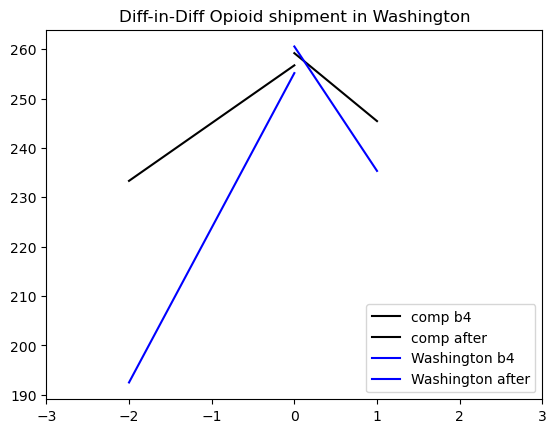

In [59]:
plt.xlim(-3, 3)
#plt.ylim(0, 500)
plt.title("Diff-in-Diff Opioid shipment in Washington")
plt.plot(X_b41, y_pred_b41,color='k', label = "comp b4")
plt.plot(X_after1, y_pred_after1,color='k', label = "comp after")
plt.plot(X_b4, y_pred_b4,color='b', label = "Washington b4")
plt.plot(X_after, y_pred_after,color='b', label = "Washington after")
plt.legend()
plt.show()